# Hands On with Simple Linear Regression
## Goal for practice
### 1. Performan simple linear regression with SKlearn
### 2. Use model performance KPIs to evaluate model performance
### 3. Perform residule diagnostic and decide proper treatment before fit the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [2]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
path="C:\\Users\\johnn\\Desktop\\github\\DataScienceProgram\\Class2\\Practice\\slr"
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
#print(os.path.join(path, data1b))

# Read Data

In [4]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [5]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [6]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
dt1b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [9]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [10]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [11]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


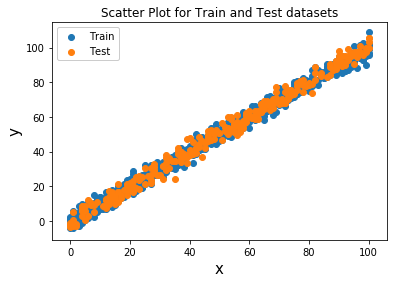

In [12]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [13]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [14]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [15]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430095851


In [16]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


Therefore the fitted line : y = -0.10726546430095851 + 1.00065638*x

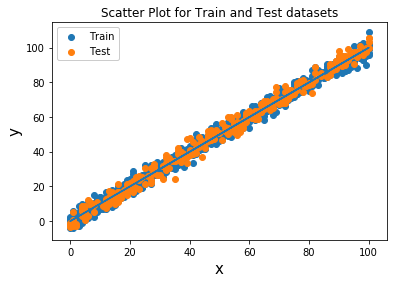

In [17]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (-0.10726546430095851 + 1.00065638*dt1b['x']))

How about build sample residual?

In [18]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

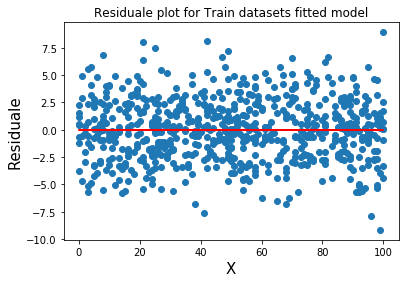

In [19]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0*dt1b['x'], color="r")

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

In [20]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [21]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [22]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [23]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [24]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [25]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [27]:
dt2b = dt2b.dropna().copy()
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


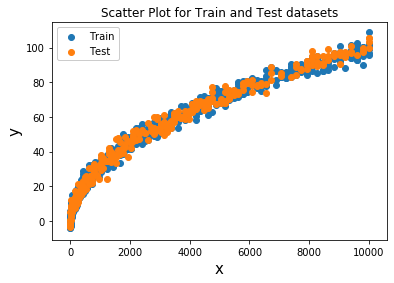

In [28]:
plt.scatter((dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

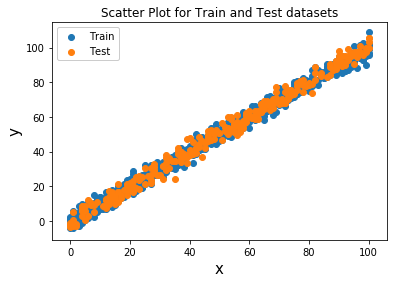

In [30]:
plt.scatter((np.sqrt(dt2b['x'])),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((np.sqrt(dt2t['x'])),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

In [31]:
x_train = np.sqrt(dt2b['x'])
y_train = dt2b['y']
x_test = np.sqrt(dt2t['x'])
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)#change 1 dimension to (xx,1)
x_test = x_test.reshape(-1,1)

In [32]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))#r-square低的话model不好
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [34]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430095851


In [33]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


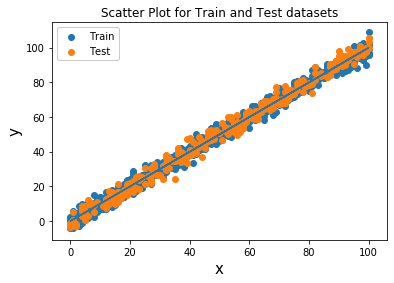

In [36]:
plt.scatter(np.sqrt(dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.sqrt(dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(np.sqrt(dt2b['x']), (-0.10726546430097983 + 1.00065638*np.sqrt(dt2b['x'])))

In [38]:

y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

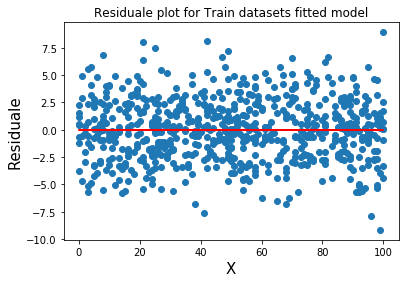

In [39]:
plt.scatter(np.sqrt(dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(np.sqrt(dt2b['x']), 0*dt2b['x'], color="r")

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [26]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [27]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [28]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [29]:
dt3b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [30]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


In [45]:
print("Train data misscnt: {}".format(dt3b.isnull().sum()))
print("Test data misscnt: {}".format(dt3t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [46]:
dt3b = dt3b.dropna().copy()
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


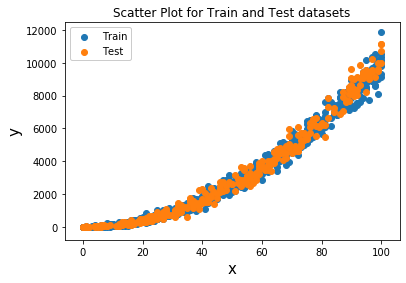

In [47]:
plt.scatter((dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

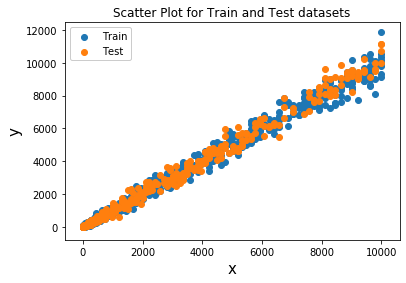

In [48]:
plt.scatter(np.square(dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.square(dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

In [49]:
x_train = np.square(dt3b['x'])
y_train = dt3b['y']
x_test = np.square(dt3t['x'])
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)#change 1 dimension to (xx,1)
x_test = x_test.reshape(-1,1)

In [50]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))#r-square低的话model不好
print(mean_squared_error(y_test,y_pred))

0.986822193228031
124783.95796242174


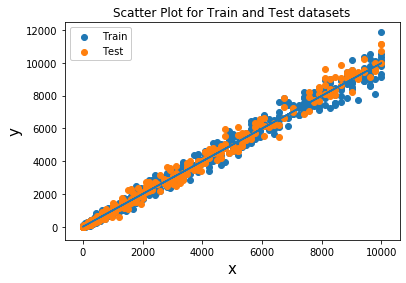

In [51]:
plt.scatter(np.square(dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.square(dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(np.square(dt3b['x']), (15.653065793340375 + 0.99576881*np.square(dt3b['x'])))

In [52]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

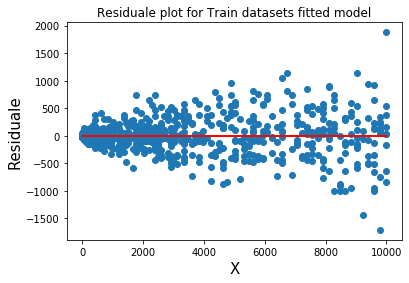

In [53]:
plt.scatter(np.square(dt3b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(np.square(dt3b['x']), 0*dt3b['x'], color="r")

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [81]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [82]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [86]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2)
    return cost

def deriv(x_train, y_train, predictions):
    #### PLease put you code here######
    derivatives = dict()
    derivatives['b1'] = np.mean(-2*np.multiply((y_train - predictions),x_train))
    derivatives['b0'] = np.mean(-2*(y_train - predictions))
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    #### PLease put you code here######
    parameters['b0'] -= learning_rate * derivatives['b0']
    parameters['b1'] -= learning_rate * derivatives['b1']
    return parameters

### Build training function

In [87]:
def train(x_train, y_train, learning_rate, iters = 5):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #Prediction
        #### PLease put you code here######
        predictions = get_pred(x_train, parameters)
        #cost function
        #### PLease put you code here######
        cost = cost_function(predictions, y_train)
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #Calc. gradient/derivatives
        #### PLease put you code here######
        derivatives = deriv(x_train, y_train, predictions)
        #update parameters
        #### PLease put you code here######
        parameters = update_parameters(parameters, derivatives, learning_rate)
    return parameters, loss

### Traing model with your function by gradient descent algrithm

Iteration = 1, Loss = 3673.519309084147


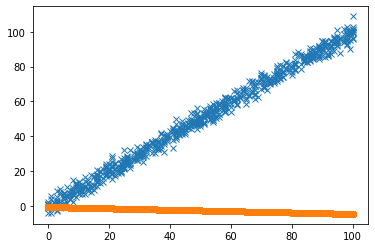

Iteration = 2, Loss = 412.28303084290286


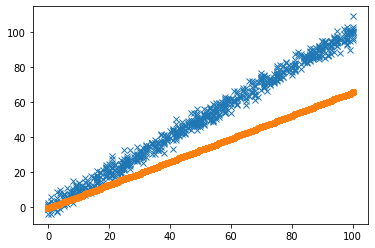

Iteration = 3, Loss = 52.53378267957388


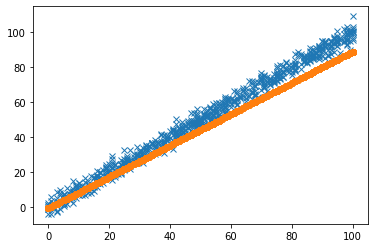

Iteration = 4, Loss = 12.849587353958913


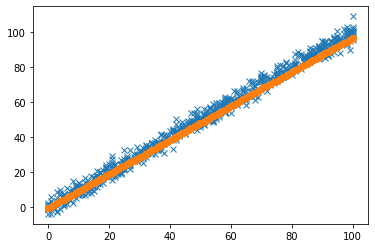

Iteration = 5, Loss = 8.471990674996363


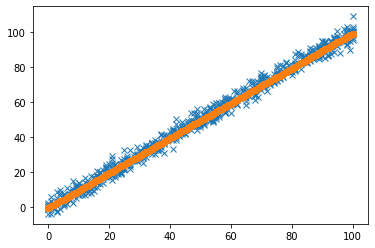

Iteration = 6, Loss = 7.9890894559110075


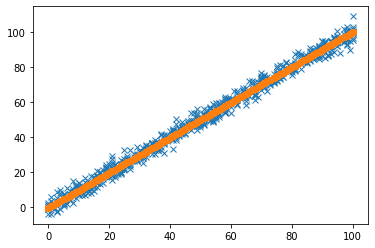

Iteration = 7, Loss = 7.93581480307377


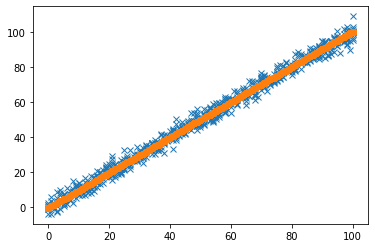

Iteration = 8, Loss = 7.9299325561981675


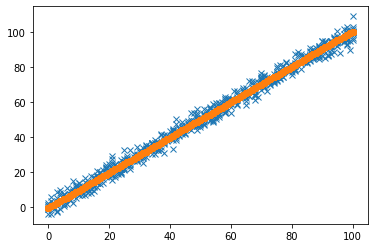

Iteration = 9, Loss = 7.929278199144643


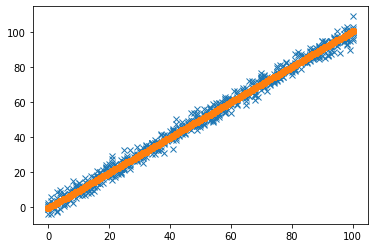

Iteration = 10, Loss = 7.929200534804152


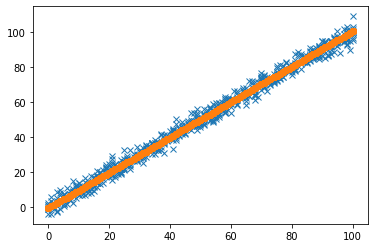

Iteration = 11, Loss = 7.929186486387732


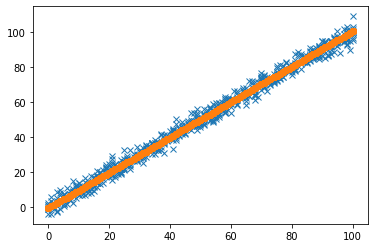

Iteration = 12, Loss = 7.929179456037788


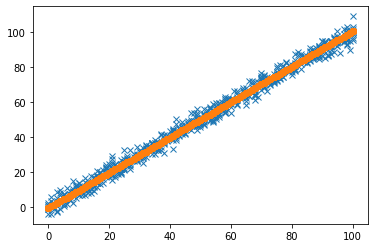

Iteration = 13, Loss = 7.929173200405224


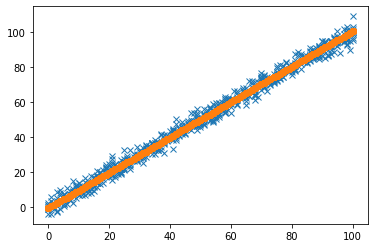

Iteration = 14, Loss = 7.929167030781802


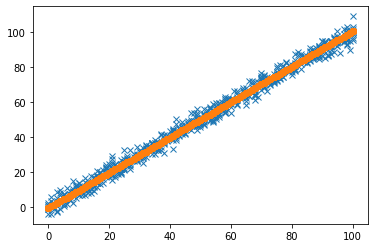

Iteration = 15, Loss = 7.929160871195575


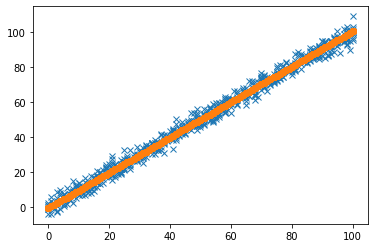

Iteration = 16, Loss = 7.929154713265978


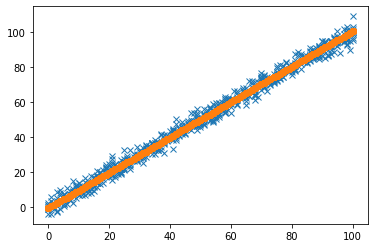

Iteration = 17, Loss = 7.929148556068484


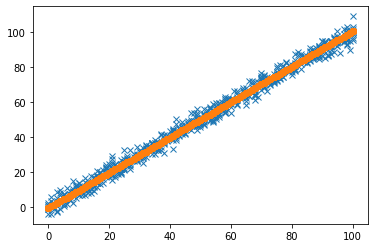

Iteration = 18, Loss = 7.929142399501057


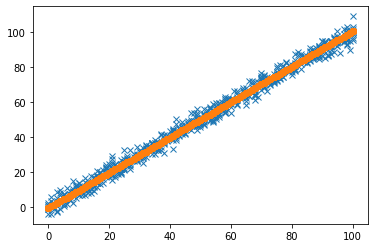

Iteration = 19, Loss = 7.929136243552385


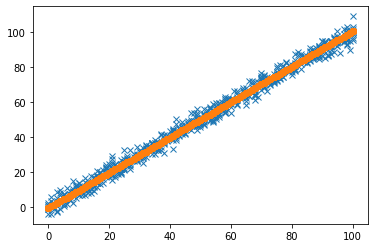

Iteration = 20, Loss = 7.929130088221164


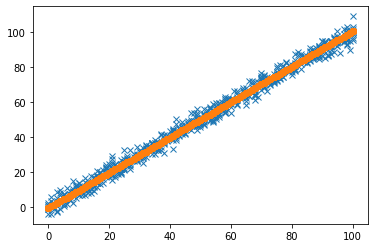

Iteration = 21, Loss = 7.929123933507199


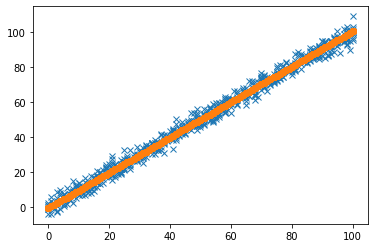

Iteration = 22, Loss = 7.929117779410405


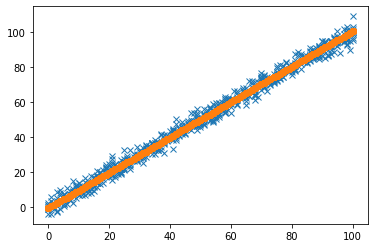

Iteration = 23, Loss = 7.929111625930723


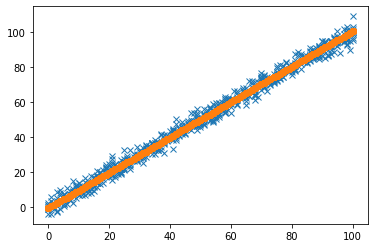

Iteration = 24, Loss = 7.929105473068095


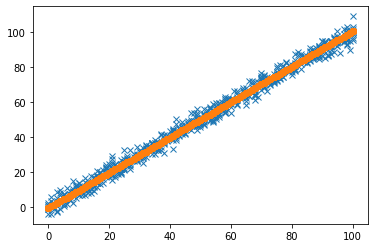

Iteration = 25, Loss = 7.929099320822455


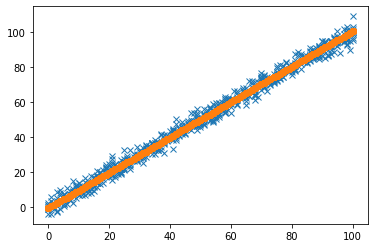

Iteration = 26, Loss = 7.92909316919374


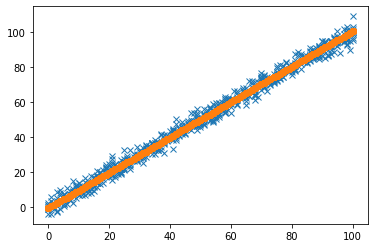

Iteration = 27, Loss = 7.929087018181888


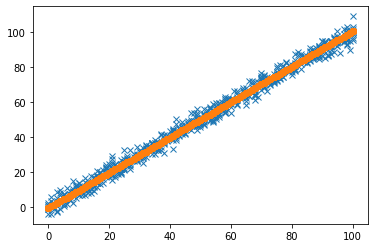

Iteration = 28, Loss = 7.929080867786839


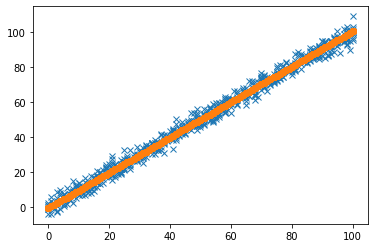

Iteration = 29, Loss = 7.929074718008534


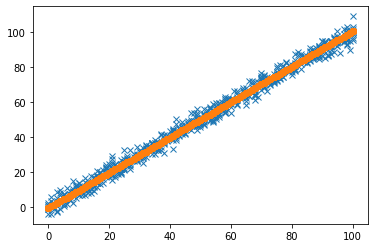

Iteration = 30, Loss = 7.9290685688469065


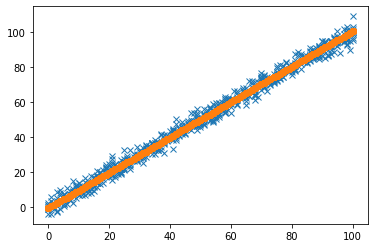

Iteration = 31, Loss = 7.9290624203018965


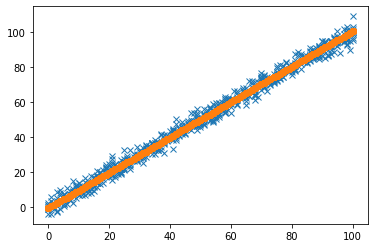

Iteration = 32, Loss = 7.929056272373441


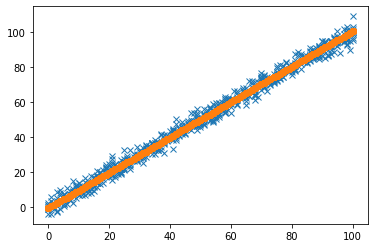

Iteration = 33, Loss = 7.929050125061479


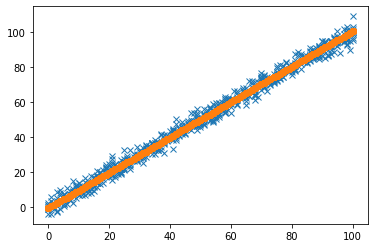

Iteration = 34, Loss = 7.929043978365948


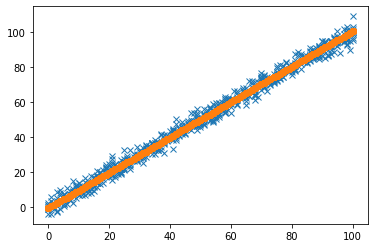

Iteration = 35, Loss = 7.929037832286787


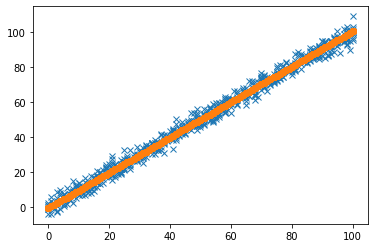

Iteration = 36, Loss = 7.929031686823936


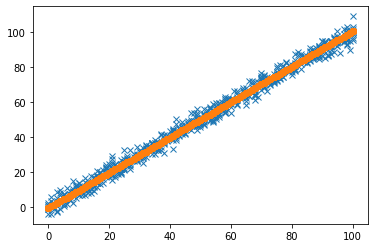

Iteration = 37, Loss = 7.929025541977331


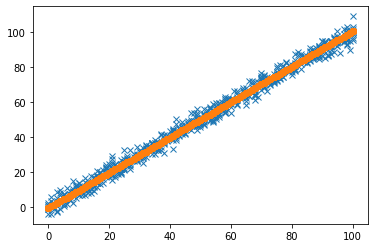

Iteration = 38, Loss = 7.92901939774691


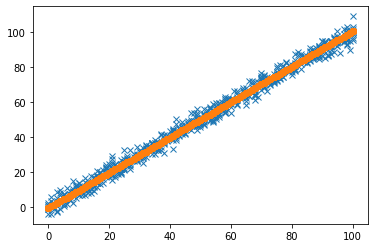

Iteration = 39, Loss = 7.9290132541326095


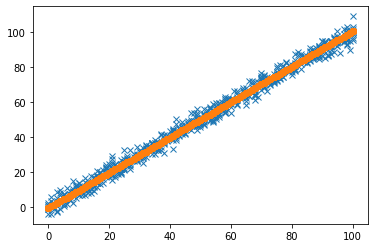

Iteration = 40, Loss = 7.929007111134373


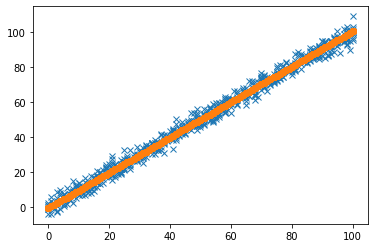

Iteration = 41, Loss = 7.929000968752132


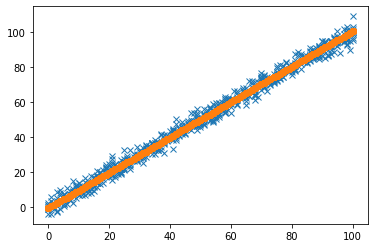

Iteration = 42, Loss = 7.928994826985831


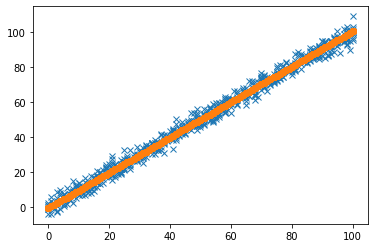

Iteration = 43, Loss = 7.928988685835407


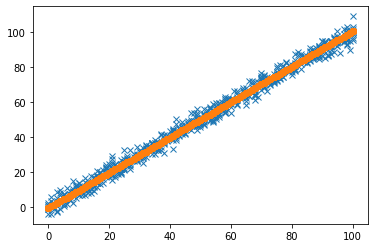

Iteration = 44, Loss = 7.928982545300793


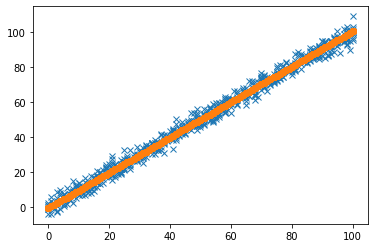

Iteration = 45, Loss = 7.9289764053819365


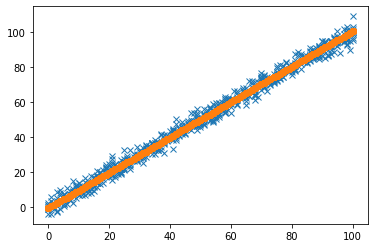

Iteration = 46, Loss = 7.928970266078764


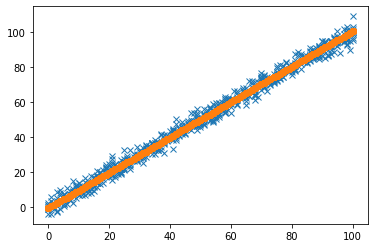

Iteration = 47, Loss = 7.928964127391224


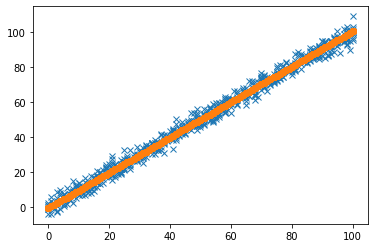

Iteration = 48, Loss = 7.928957989319253


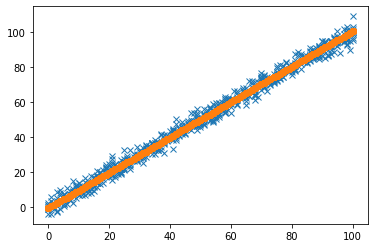

Iteration = 49, Loss = 7.928951851862783


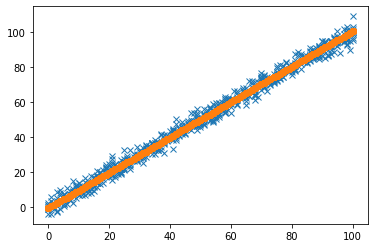

Iteration = 50, Loss = 7.928945715021756


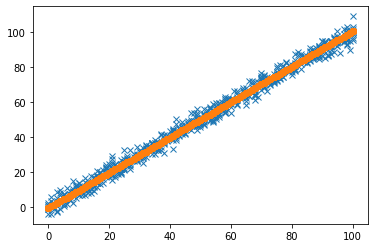

({'b1': 1.008056995428356, 'b0': -0.6012404932948018},
 [3673.519309084147,
  412.28303084290286,
  52.53378267957388,
  12.849587353958913,
  8.471990674996363,
  7.9890894559110075,
  7.93581480307377,
  7.9299325561981675,
  7.929278199144643,
  7.929200534804152,
  7.929186486387732,
  7.929179456037788,
  7.929173200405224,
  7.929167030781802,
  7.929160871195575,
  7.929154713265978,
  7.929148556068484,
  7.929142399501057,
  7.929136243552385,
  7.929130088221164,
  7.929123933507199,
  7.929117779410405,
  7.929111625930723,
  7.929105473068095,
  7.929099320822455,
  7.92909316919374,
  7.929087018181888,
  7.929080867786839,
  7.929074718008534,
  7.9290685688469065,
  7.9290624203018965,
  7.929056272373441,
  7.929050125061479,
  7.929043978365948,
  7.929037832286787,
  7.929031686823936,
  7.929025541977331,
  7.92901939774691,
  7.9290132541326095,
  7.929007111134373,
  7.929000968752132,
  7.928994826985831,
  7.928988685835407,
  7.928982545300793,
  7.9289764053819

In [91]:
train(x_train, y_train, 0.0001, 50)

### Print your final fitted model/ validate model on test data set

Iteration = 1, Loss = 3624.74112536458


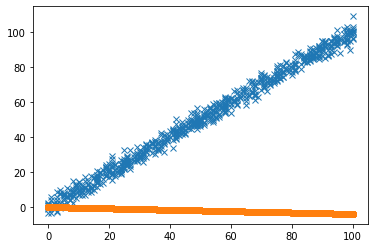

Iteration = 2, Loss = 406.8478473184653


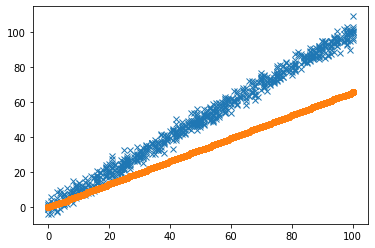

Iteration = 3, Loss = 51.879801118028475


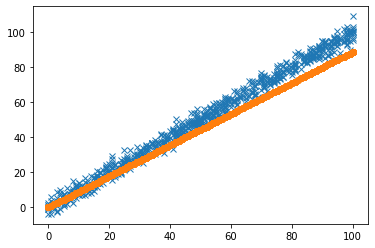

Iteration = 4, Loss = 12.723028964520502


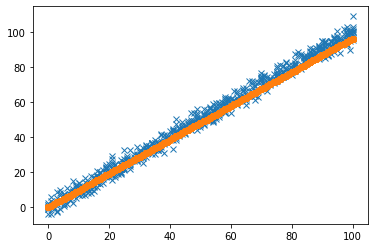

Iteration = 5, Loss = 8.40361815937455


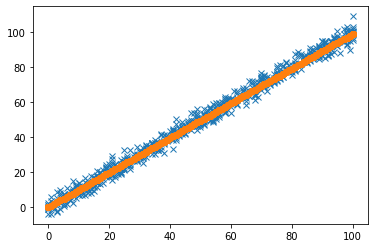

Iteration = 6, Loss = 7.92714092073832


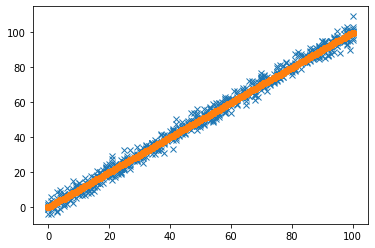

Iteration = 7, Loss = 7.874580357335231


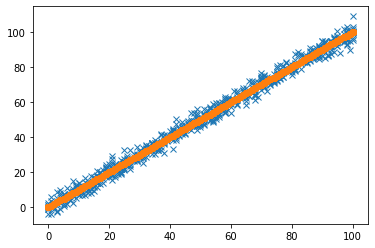

Iteration = 8, Loss = 7.868782337296488


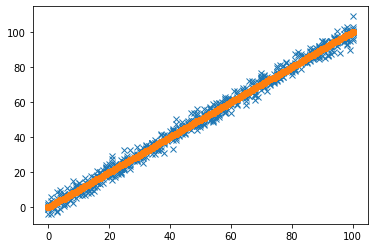

Iteration = 9, Loss = 7.868142725951505


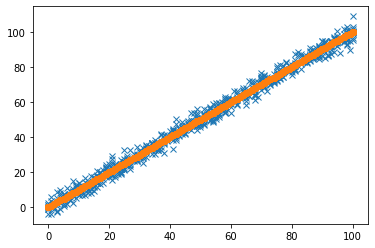

Iteration = 10, Loss = 7.868072142260985


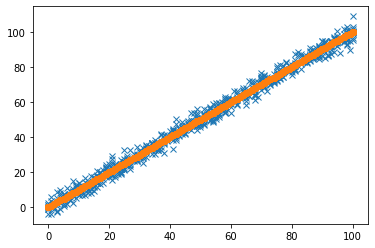

Iteration = 11, Loss = 7.868064328409681


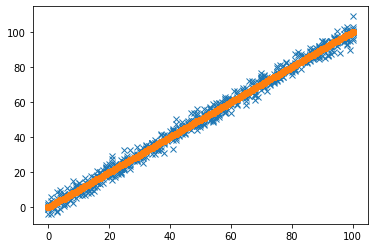

Iteration = 12, Loss = 7.8680634387457875


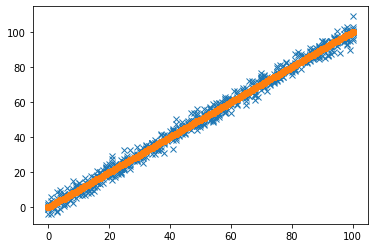

Iteration = 13, Loss = 7.868063312896603


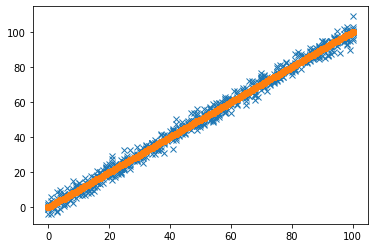

Iteration = 14, Loss = 7.86806327130713


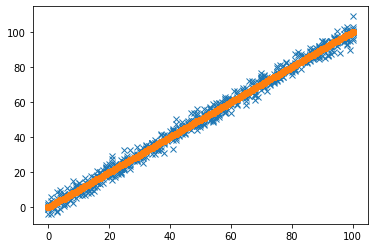

Iteration = 15, Loss = 7.868063239015181


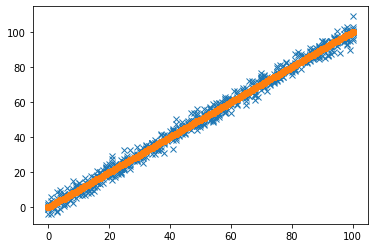

Iteration = 16, Loss = 7.8680632077516295


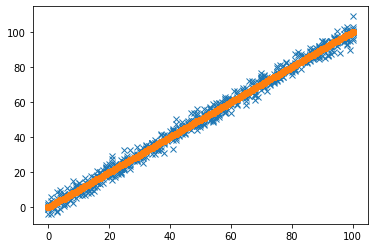

Iteration = 17, Loss = 7.868063176604296


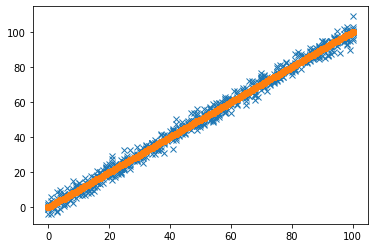

Iteration = 18, Loss = 7.868063145472563


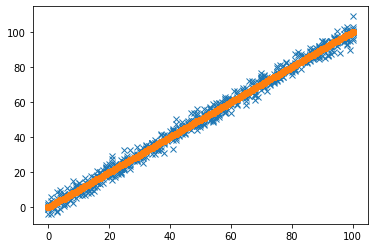

Iteration = 19, Loss = 7.8680631143453255


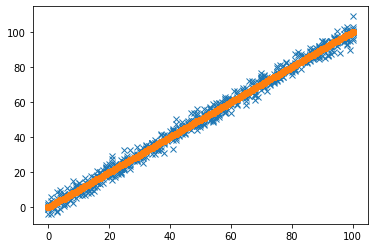

Iteration = 20, Loss = 7.868063083221362


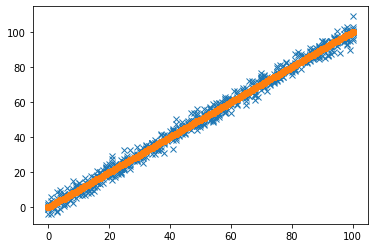

Iteration = 21, Loss = 7.868063052100537


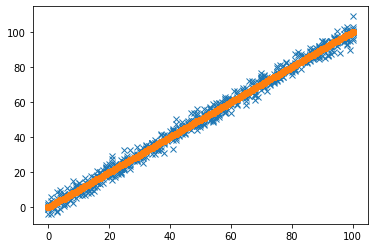

Iteration = 22, Loss = 7.868063020982832


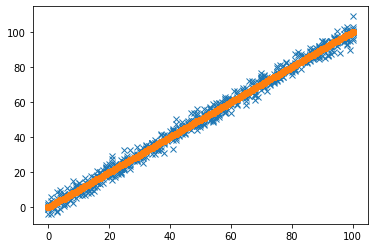

Iteration = 23, Loss = 7.868062989868248


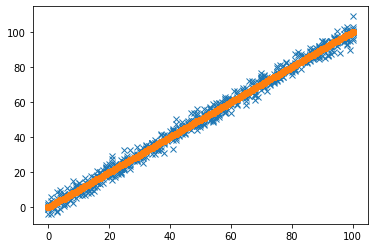

Iteration = 24, Loss = 7.868062958756787


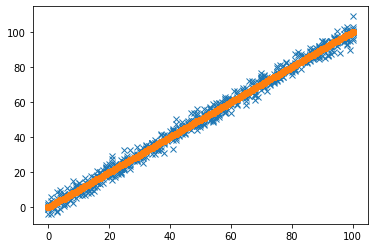

Iteration = 25, Loss = 7.868062927648444


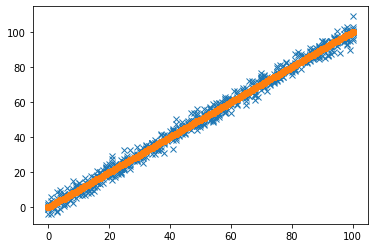

Iteration = 26, Loss = 7.86806289654322


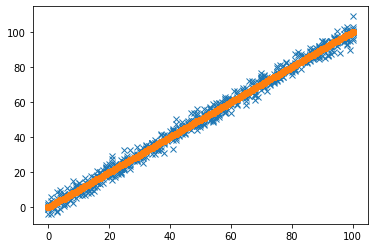

Iteration = 27, Loss = 7.868062865441116


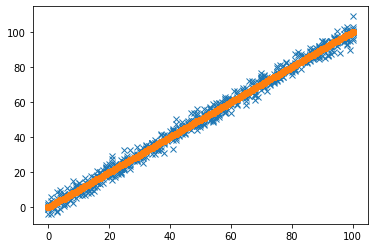

Iteration = 28, Loss = 7.8680628343421315


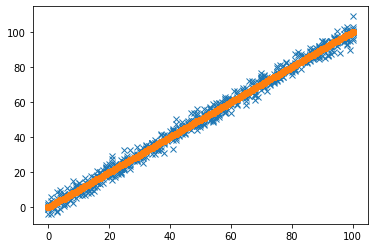

Iteration = 29, Loss = 7.8680628032462625


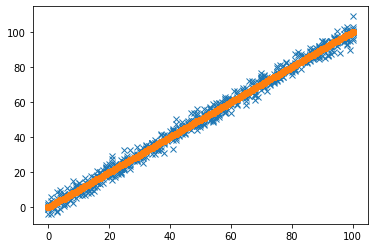

Iteration = 30, Loss = 7.868062772153515


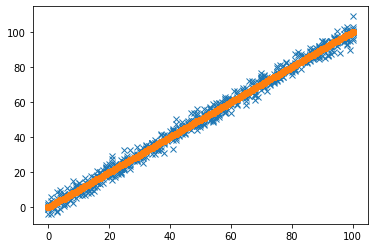

Iteration = 31, Loss = 7.868062741063883


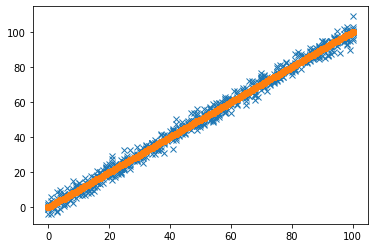

Iteration = 32, Loss = 7.868062709977371


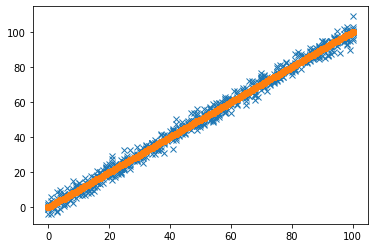

Iteration = 33, Loss = 7.868062678893974


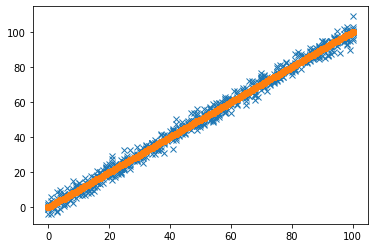

Iteration = 34, Loss = 7.868062647813695


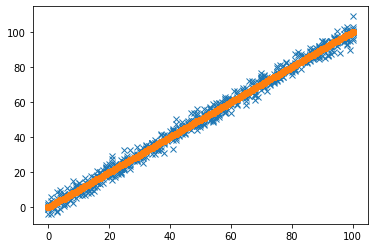

Iteration = 35, Loss = 7.868062616736533


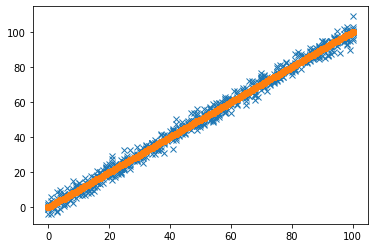

Iteration = 36, Loss = 7.868062585662488


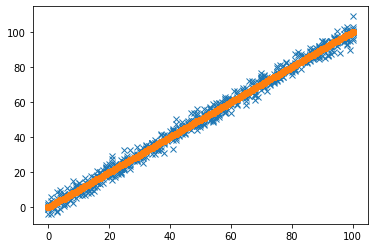

Iteration = 37, Loss = 7.868062554591558


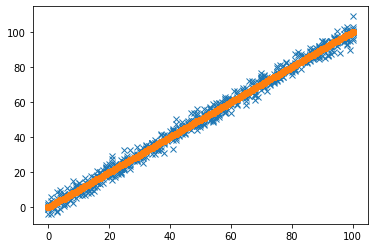

Iteration = 38, Loss = 7.868062523523742


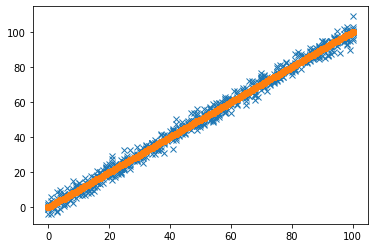

Iteration = 39, Loss = 7.868062492459044


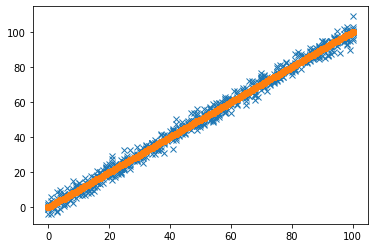

Iteration = 40, Loss = 7.868062461397458


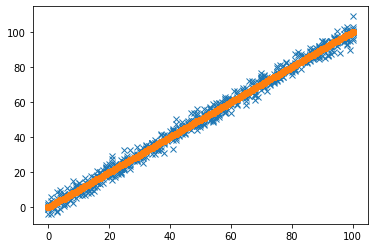

Iteration = 41, Loss = 7.868062430338987


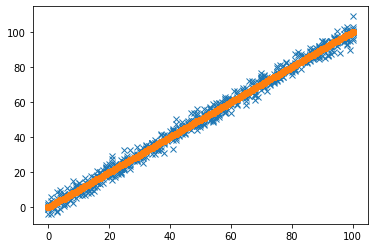

Iteration = 42, Loss = 7.868062399283636


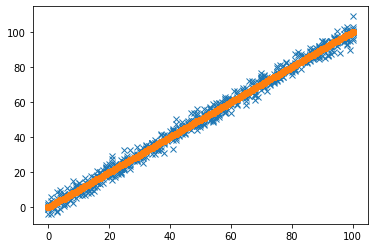

Iteration = 43, Loss = 7.868062368231395


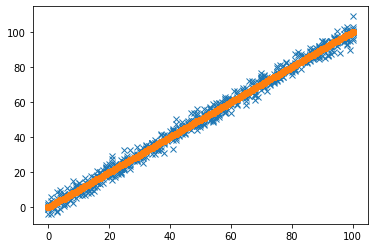

Iteration = 44, Loss = 7.868062337182265


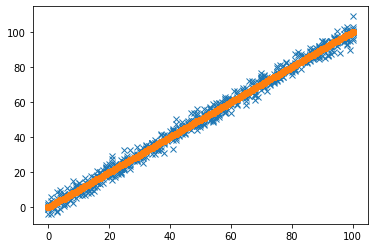

Iteration = 45, Loss = 7.868062306136255


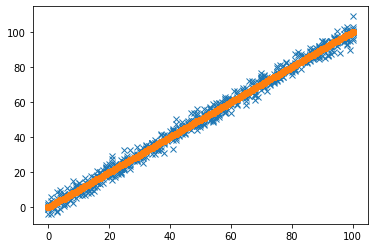

Iteration = 46, Loss = 7.868062275093353


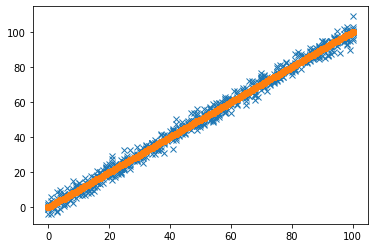

Iteration = 47, Loss = 7.868062244053566


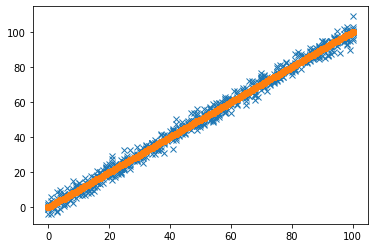

Iteration = 48, Loss = 7.868062213016891


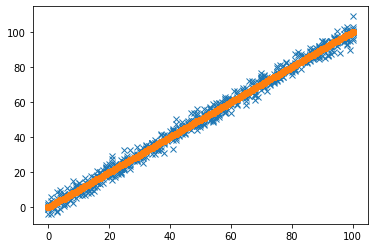

Iteration = 49, Loss = 7.868062181983329


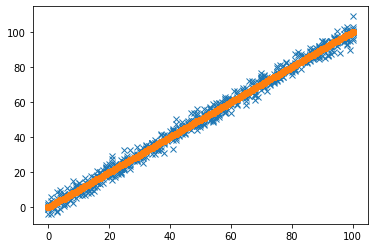

Iteration = 50, Loss = 7.868062150952878


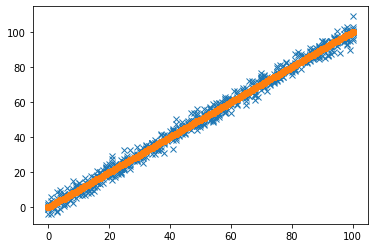

In [93]:
parameters, loss=train(x_train, y_train, 0.0001, iters = 50)

In [94]:
print("intercept: {}".format(parameters['b0']))
print("coeffcient: {}".format(parameters['b1']))

intercept: -0.142391294724456
coeffcient: 1.0011826284924772


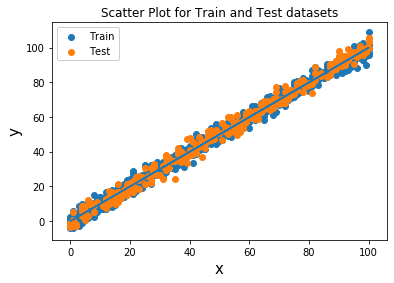

In [95]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot((dt1b['x']), (parameters['b0'] + parameters['b1']*(dt1b['x'])))

In [97]:
y_pred_b = parameters['b1']*x_train + parameters['b0']
residual = y_pred_b - y_train

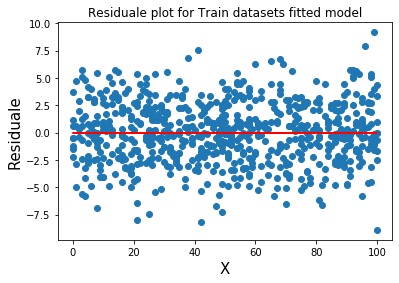

In [98]:
plt.scatter((dt1b['x']),residual)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot((dt1b['x']), 0*dt1b['x'], color="r")